In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from scipy.special import boxcox
from scipy import stats
import matplotlib.pyplot as plt
sns.set()


from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#Importing the Dataset and Cleaning
Data = pd.read_csv("innercity.csv")
Data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [3]:
rows_count, columns_count = Data.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 21613
Total Number of columns : 23


In [4]:
#Summarizing the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [5]:
#Finding statistical details
Data.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.196687,1.718687e+04
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.397503,4.158908e+04
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.423000e+03
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,7.035000e+03
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,9.575000e+03
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.300000e+04
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.652659e+06


From the descriptive analysis, we can make the following observations of the working dataset, that will need to be examined further.

bedrooms: the min is 0. All houses generally should have bedrooms. This could be a case of missing value
bedrooms: the max is 33. The square footage of this house will have to be looked at, to affirm this makes sense. This could also be a case of mistype.
bathrooms: the min is 0. All houses have at least 1 bathroom. This could be a case of missing value.
floors: The number of floors seems to be a float with .5. In real-estate definition a 1.5 storey house means that the house has a floor that only spans half the size of the main floor. The data is valid here.
coast: the max is 1. The value is 0 at 25%, 50% and 75%. This makes sense since this variable is a dummy. Houses that have a waterfront view have a value of 1 and for no waterfront view the value is 0.
sight: the max is 4 but the value is 0 at 25%, 50% and 75%. This tells  that some houses seem to have a view rating of even 0.
sqft_basement: the values at the 25th and 50th percentile is 0. This could mean that only some houses have basements and others don't.
yr_renovated: The value is 0 at 25%, 50% and 75%. This could mean that some house were never renovated once built.

In [6]:
#Column labels
Data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [7]:
#Layout of the arrays
Data.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [8]:
#All attributes are numeric except for dayhours
Data.dayhours.value_counts()

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150308T000000      1
20150215T000000      1
20150131T000000      1
20140727T000000      1
20150527T000000      1
Name: dayhours, Length: 372, dtype: int64

In [9]:
#Detecting missing value
Data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [10]:
Data.isnull().values.any()

False

In [11]:
# looking at the number of unique values in the data for each feature
Data.nunique()

cid                 21436
dayhours              372
price                3625
room_bed               13
room_bath              30
living_measure       1038
lot_measure          9782
ceil                    6
coast                   2
sight                   5
condition               5
quality                12
ceil_measure          946
basement              306
yr_built              116
yr_renovated           70
zipcode                70
lat                  5034
long                  752
living_measure15      777
lot_measure15        8689
furnished               2
total_area          11163
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E9FE5C8D0>]],
      dtype=object)

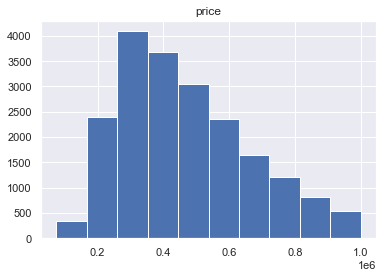

In [12]:
# Featurizing
# examining the target variable data distribution
Data=Data[Data['price'] <= 1000000]
#cut out over 1000000 for more normal distribution
Data.hist(column='price')

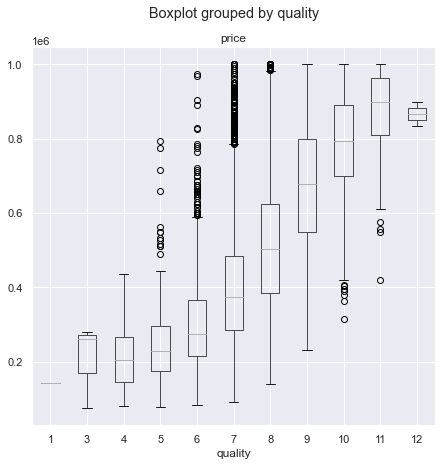

In [13]:
#Visualizing quality and price distribution
Data.boxplot('price', by = 'quality',figsize=(7,7))

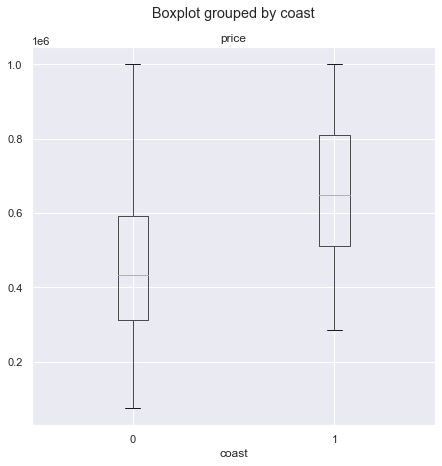

In [14]:
#Visualizing coast and price distribution
Data.boxplot('price', by = 'coast',figsize=(7,7))

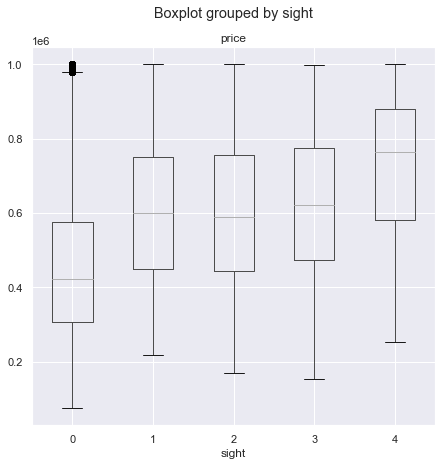

In [15]:
#Visualizing sight and price distribution
Data.boxplot('price', by = 'sight',figsize=(7,7))

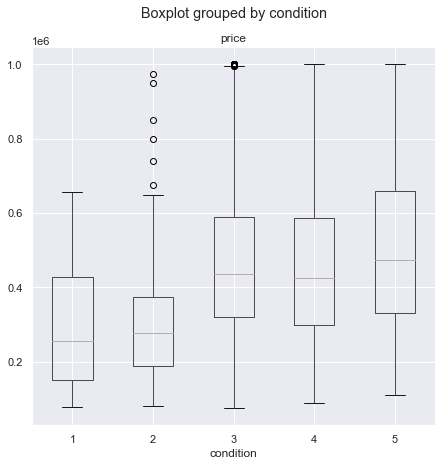

In [16]:
#Visualizing condition and price distribution
Data.boxplot('price', by = 'condition',figsize=(7,7))

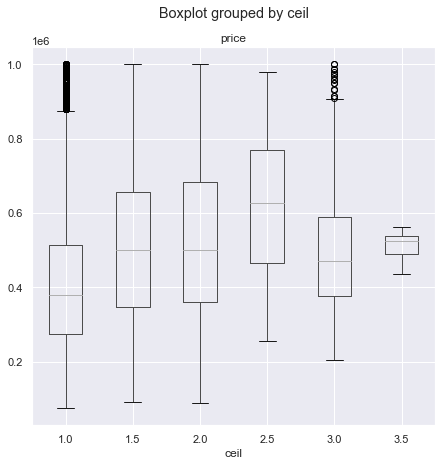

In [17]:
#Visualizing ceil and price distribution
Data.boxplot('price', by = 'ceil',figsize=(7,7))

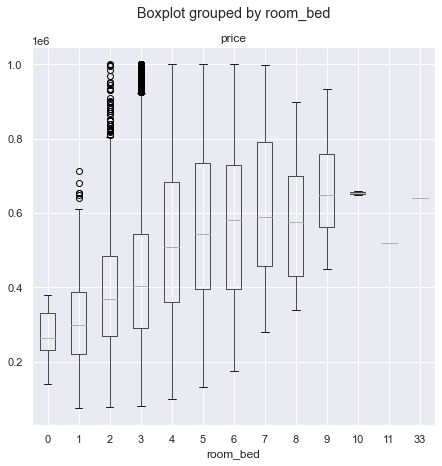

In [18]:
#Visualizing room_bed and price distribution
Data.boxplot('price', by = 'room_bed',figsize=(7,7))

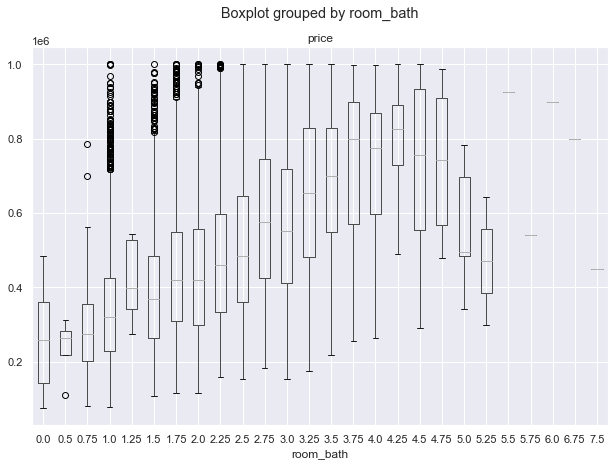

In [19]:
#Visualizing room_bath and price distribution
Data.boxplot('price', by = 'room_bath',figsize=(10,7))

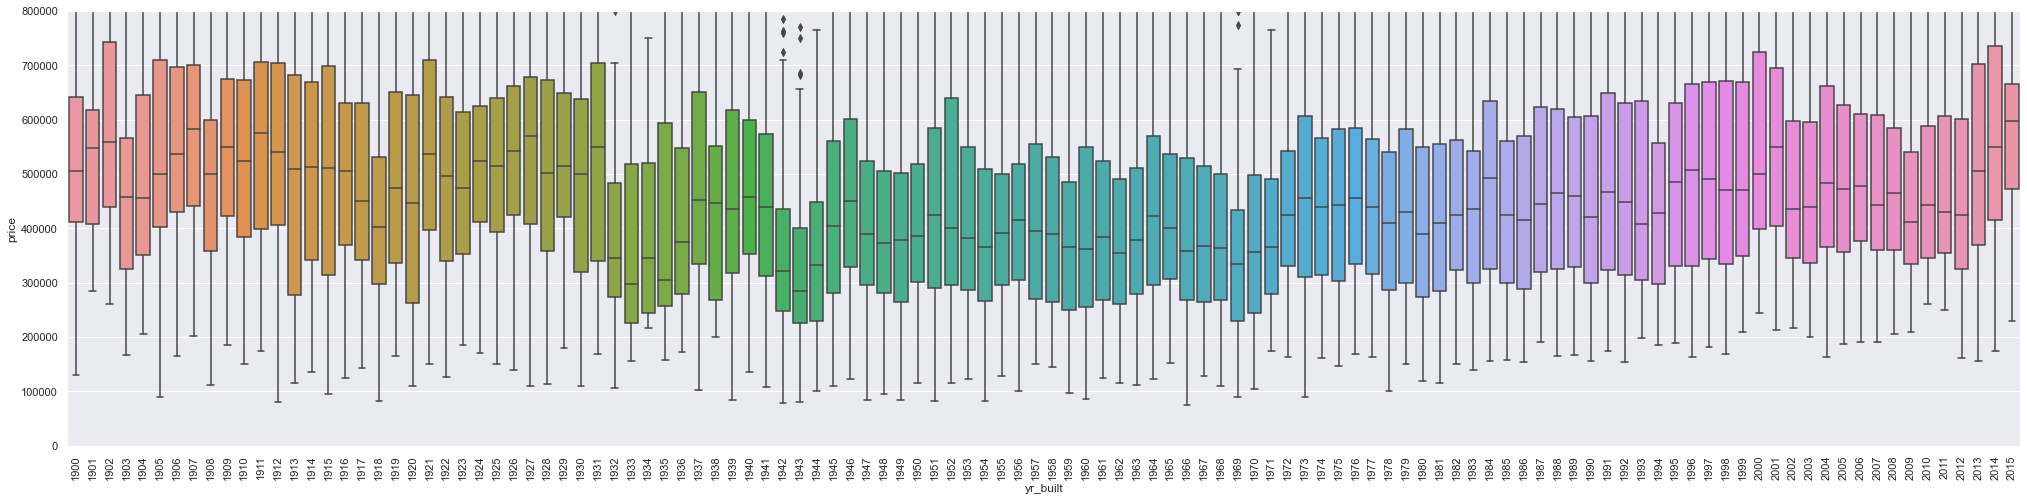

In [20]:
#Visualization needed since this attribute has a large dataset
var = 'yr_built'
data = pd.concat([Data['price'], Data[var]], axis=1)
f, ax = plt.subplots(figsize=(35, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

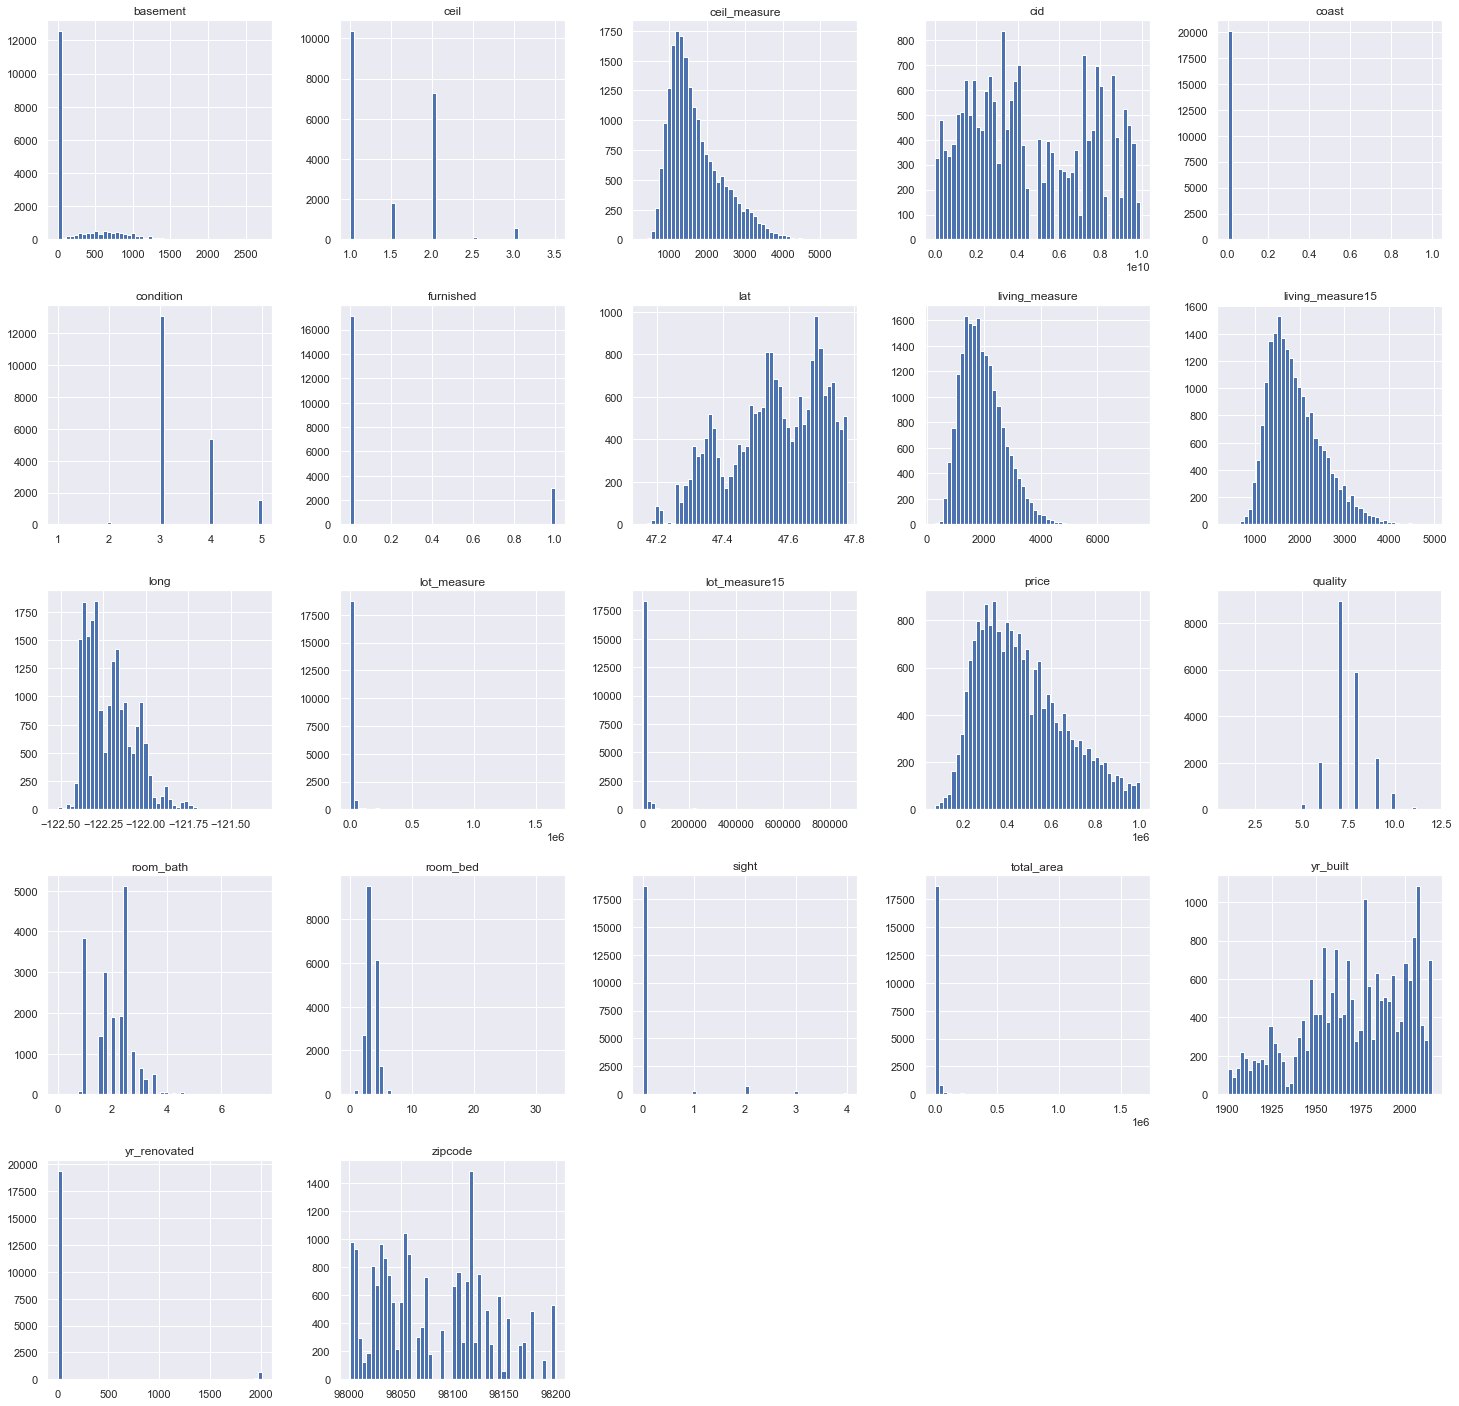

In [21]:
#examining the distribution of data for all variables in the data
Data.hist(figsize=(25,25),bins=50);

In [22]:
corr=Data.corr()

In [23]:
corr

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
cid,1.000000,0.017267,0.010661,0.026764,0.011256,-0.133775,0.031258,0.001999,0.017392,-0.026688,...,-0.004339,0.027182,-0.021264,-0.005972,0.004236,0.021185,0.013508,-0.144310,0.009941,-0.133145
price,0.017267,1.000000,0.289105,0.439805,0.604379,0.093852,0.269447,0.052715,0.214121,0.034349,...,0.222084,0.058022,0.076460,-0.018851,0.440662,0.077184,0.549448,0.081566,0.500082,0.104950
room_bed,0.010661,0.289105,1.000000,0.489407,0.586496,0.023652,0.150946,-0.030162,0.030610,0.026639,...,0.281475,0.159347,0.002339,-0.148874,-0.033470,0.138896,0.369096,0.020048,0.198953,0.034632
room_bath,0.026764,0.439805,0.489407,1.000000,0.711350,0.061481,0.501650,-0.005897,0.083478,-0.138243,...,0.216962,0.548392,0.021998,-0.210765,-0.016536,0.248914,0.520800,0.061351,0.391246,0.074697
living_measure,0.011256,0.604379,0.586496,0.711350,1.000000,0.156514,0.336746,0.002450,0.151188,-0.074327,...,0.373323,0.355996,0.017630,-0.209502,0.000873,0.289109,0.731749,0.170166,0.554504,0.174873
lot_measure,-0.133775,0.093852,0.023652,0.061481,0.156514,1.000000,-0.018775,0.025961,0.081524,-0.002449,...,0.012790,0.040761,0.012511,-0.128954,-0.096172,0.217886,0.140740,0.706326,0.109195,0.999827
ceil,0.031258,0.269447,0.150946,0.501650,0.336746,-0.018775,1.000000,-0.004820,-0.016662,-0.278161,...,-0.300173,0.514245,-0.004630,-0.066450,0.033178,0.136625,0.266930,-0.023150,0.319401,-0.012369
coast,0.001999,0.052715,-0.030162,-0.005897,0.002450,0.025961,-0.004820,1.000000,0.302966,0.015792,...,0.014262,-0.040485,0.057686,0.043609,-0.046190,-0.061397,0.004259,0.032557,-0.004683,0.025926
sight,0.017392,0.214121,0.030610,0.083478,0.151188,0.081524,-0.016662,0.302966,1.000000,0.030467,...,0.183449,-0.067296,0.058180,0.100870,-0.032874,-0.076837,0.170907,0.077937,0.102246,0.084119
condition,-0.026688,0.034349,0.026639,-0.138243,-0.074327,-0.002449,-0.278161,0.015792,0.030467,1.000000,...,0.177031,-0.350749,-0.059016,-0.007289,-0.019198,-0.098214,-0.121996,0.002682,-0.146436,-0.003843


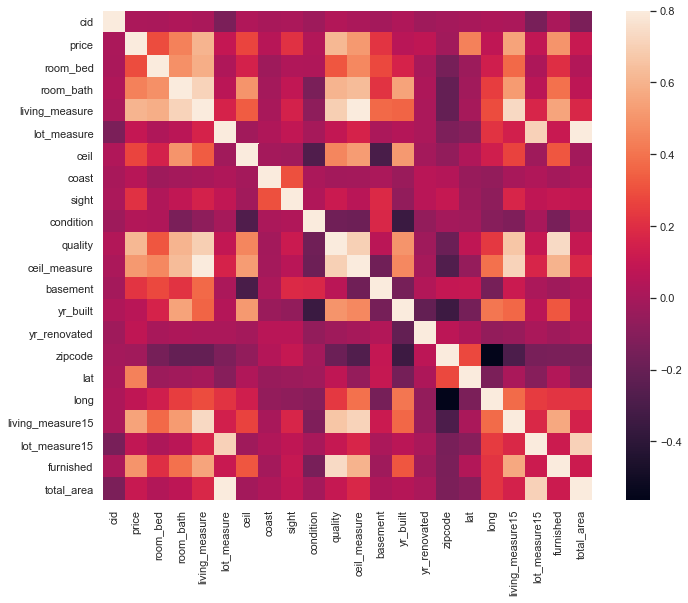

In [24]:
#correlation matrix
corrmat = Data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

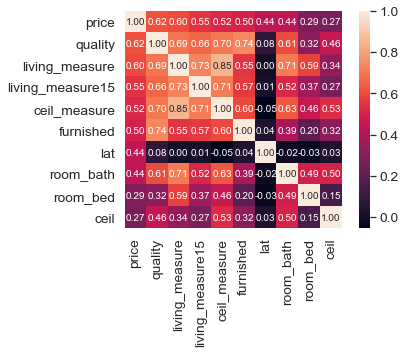

In [25]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(Data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The features quality, living_measure, living_measure15, ceil_measure displayed the highest correlation wih the price of the house.
Moreover, there is a high correlation of living_measure  with e.g. number of bathrooms and grade. This is common sense, as the square feet increase, so does the number of floors and bathrooms. There is potential to implement clever feature engineering here.

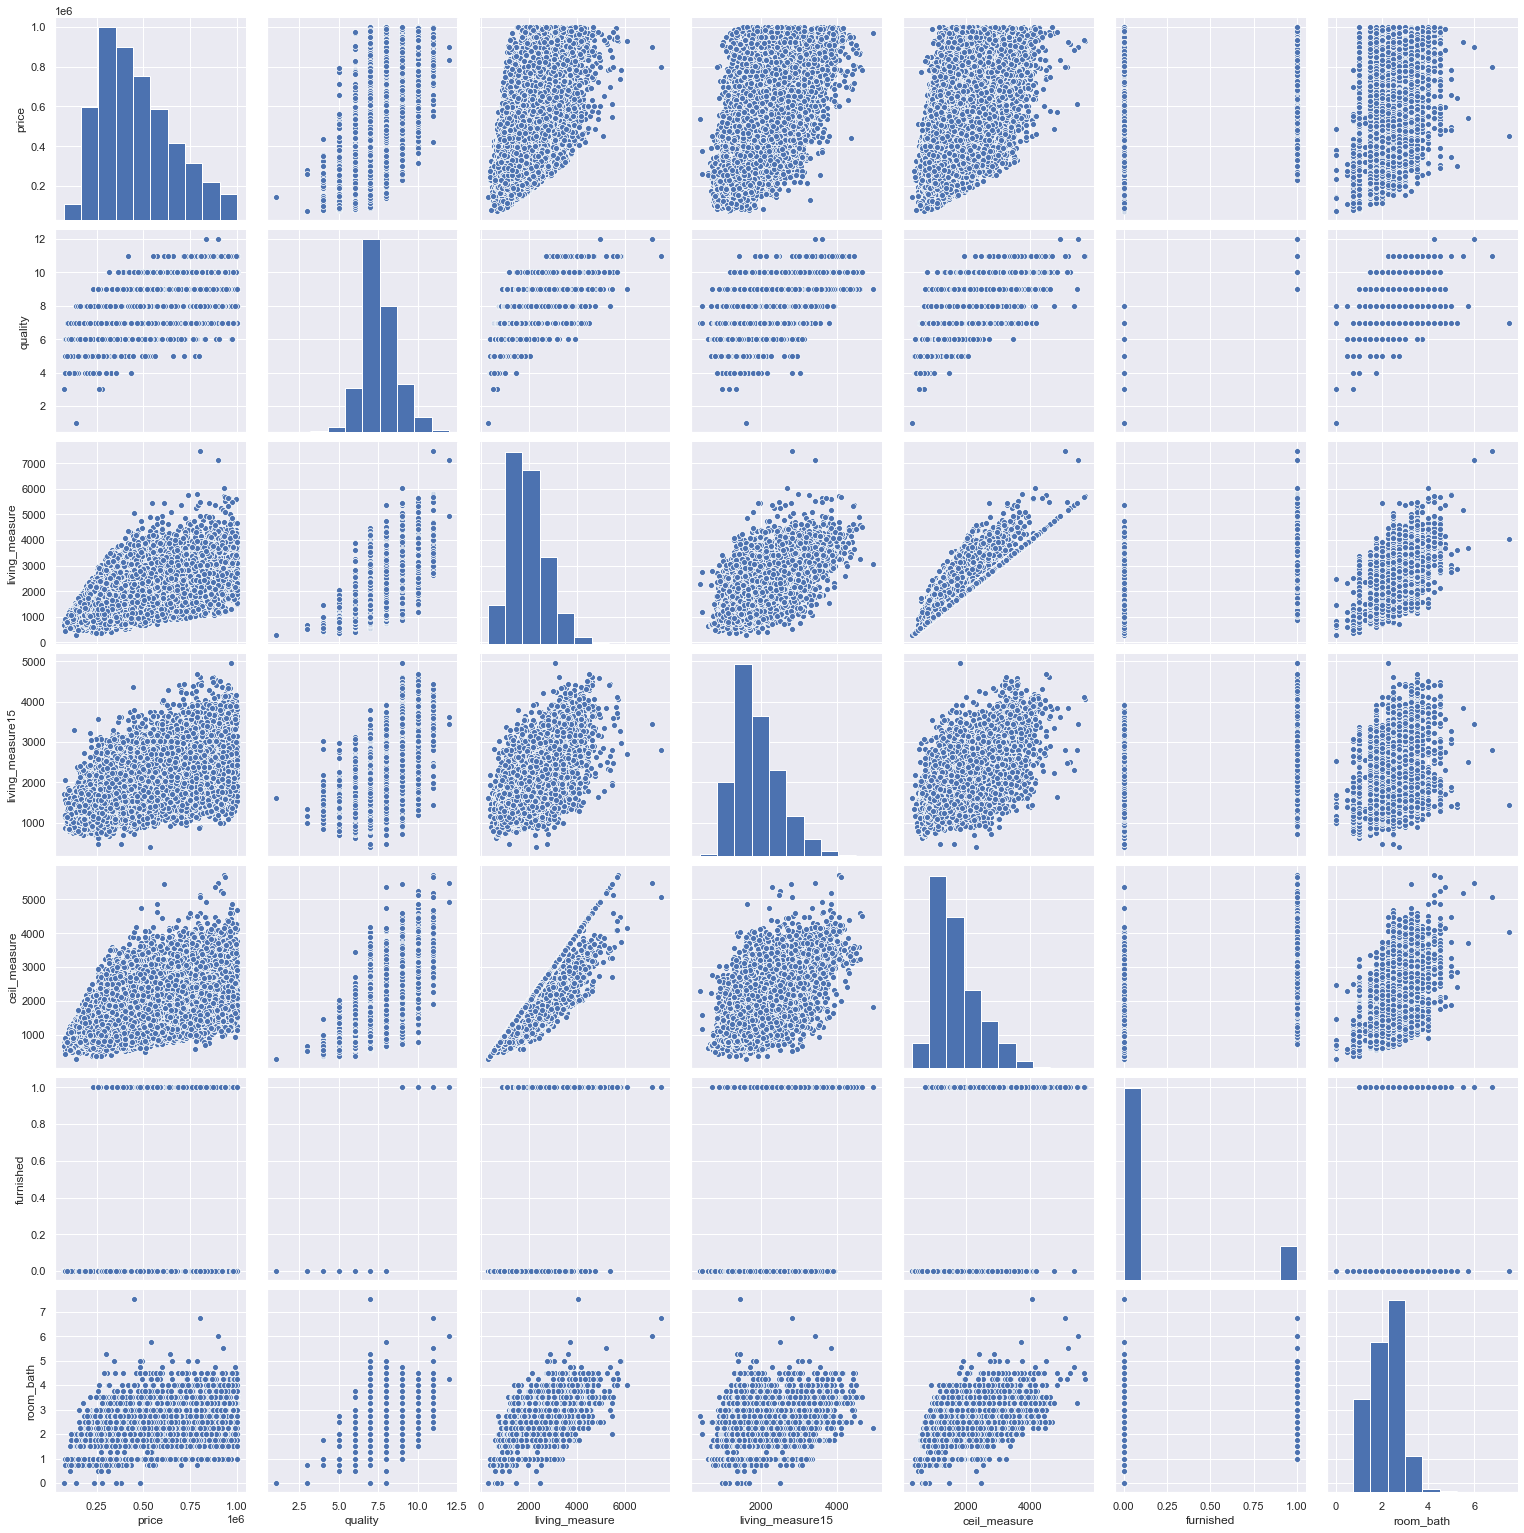

In [26]:
sns.set()
cols = ['price', 'quality', 'living_measure', 'living_measure15', 'ceil_measure', 'furnished', 'room_bath']
sns.pairplot(Data[cols],size=3)
plt.show()

In [27]:
cor = Data.drop(['price'], axis=1).corr()
for i, col in enumerate(cor.columns):
    for row in cor.index[i+1:]:
        if col != row and cor[col][row] > 0.7:
            print(f'({row}, {col}): {cor[col][row]}')

(living_measure, room_bath): 0.7113500184102091
(ceil_measure, living_measure): 0.8501254962484194
(living_measure15, living_measure): 0.731749494485066
(lot_measure15, lot_measure): 0.70632559620109
(total_area, lot_measure): 0.9998267177195838
(ceil_measure, quality): 0.7003502999935569
(furnished, quality): 0.7389531540038449
(living_measure15, ceil_measure): 0.7121409020163229
(total_area, lot_measure15): 0.7073268418902066


From the plots above, we can see that few varibles are highly correlated, and it makes sense for them to be correlated. Hence, for now we might want to keep them.

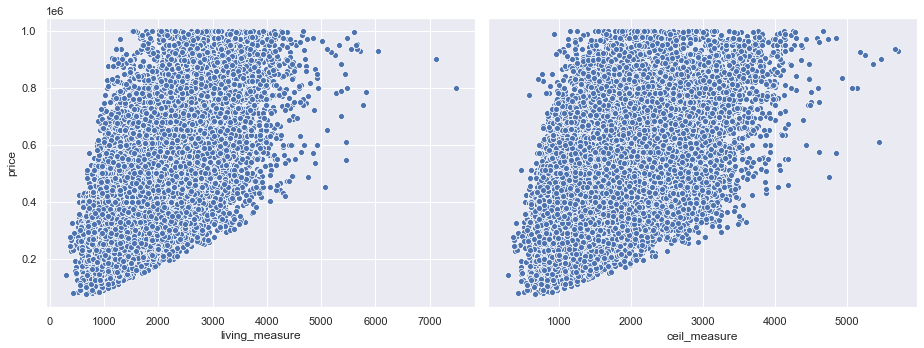

In [28]:
#Scatterplot for Multivariate analysis
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1) # n is the position of your subplot (1 to 4)
sns.scatterplot(Data['living_measure'],Data['price'])
plt.subplot(1, 2, 2) # n is the position of your subplot (1 to 4)
sns.scatterplot(Data['ceil_measure'],Data['price'])
w = plt.gca().get_yaxis() 
w.set_visible(False) 
plt.tight_layout()

The price certainly increases with living_measure and ceil_measure attributes.

In [29]:
#standardizing data to mitigate skewness and kurtosis
from sklearn.preprocessing import StandardScaler
price_scaled = StandardScaler().fit_transform(Data['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.99904554]
 [-1.98377916]
 [-1.97360157]
 [-1.96851278]
 [-1.96342399]
 [-1.96087959]
 [-1.95833519]
 [-1.9532464 ]
 [-1.94815761]
 [-1.94815761]]

outer range (high) of the distribution:
[[2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]]


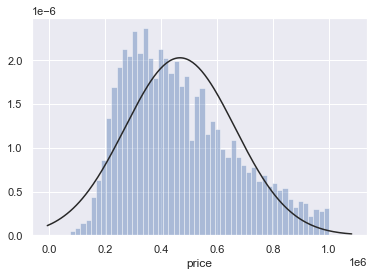

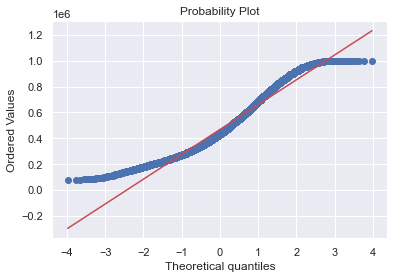

In [30]:
#normalizing living_measure and price
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(Data['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(Data['price'], plot=plt)

In [31]:
#log fitted to a normal distribution curve
#applying log transformation

#Data['price'] = np.log(Data['price'])

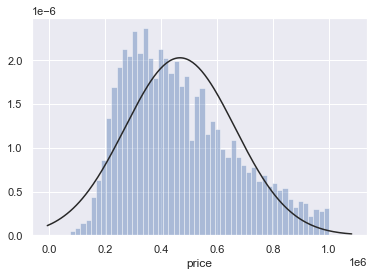

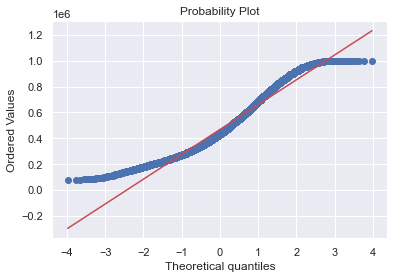

In [32]:
#transformed histogram and normal probability plot
sns.distplot(Data['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(Data['price'], plot=plt)

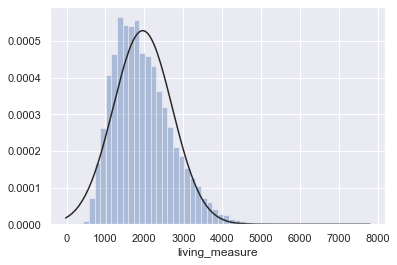

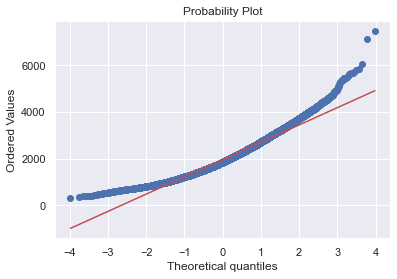

In [33]:
#histogram and normal probability plot
sns.distplot(Data['living_measure'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(Data['living_measure'], plot=plt)

In [34]:
#data transformation
Data['living_measure'] = np.log(Data['living_measure'])

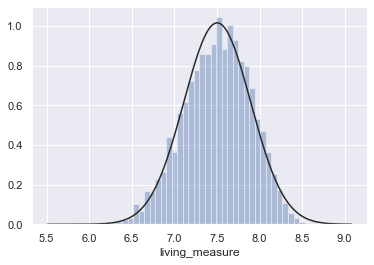

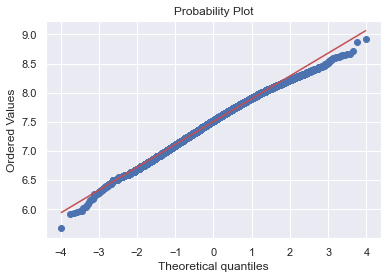

In [35]:
#transformed histogram and normal probability plot
sns.distplot(Data['living_measure'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(Data['living_measure'], plot=plt)

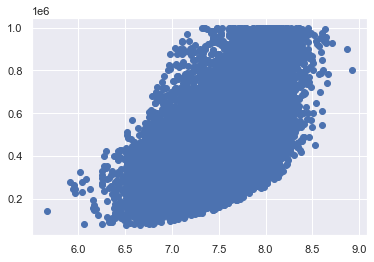

In [36]:
#scatter plot for visualizing linear relationship between the attributes
plt.scatter(Data['living_measure'], Data['price']);

# Modelling

# Multiple linear regression

In [37]:
df= Data

In [38]:
df.drop(["cid","dayhours"], axis=1, inplace=True)

Removing cid variable from the data as it is only a set of unique ids and does not contribute much to the model.

Removing dayhours variable from the data as it contains many special characters and alphanumerics that will not be accepted by the model.

All of the houses are sold either in 2014 or 2015. This means there is no much variation in the dayhours column. Since the price column has a large variation with many differences in the prices with respect to other features, there will be no significant effect even if we remove this column from the data.


In [39]:
df.loc[:, df.columns != 'price'].columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

In [40]:
# Split the dataset into train and test sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
# Define the train and test sets
X_train = train_set.loc[:, train_set.columns != 'price']
y_train = train_set['price']
X_test = test_set.loc[:, train_set.columns != 'price']
y_test = test_set['price']

# Determing the number of folds for the cross validation

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

Cross validation with 2 folds : 90.87114271286742
Cross validation with 3 folds : 30.086564460555604
Cross validation with 4 folds : 10.039149370613586
Cross validation with 5 folds : 11.991900127764165
Cross validation with 6 folds : 13.260615566242242
Cross validation with 7 folds : 1.6718067046071414
Cross validation with 8 folds : 0.7053461548245252
Cross validation with 9 folds : 1.5333668272438483
Cross validation with 10 folds : 0.06668560134328913
Cross validation with 11 folds : 7.104131424234589
Cross validation with 12 folds : 2.694542143437841
Cross validation with 13 folds : 10.194423224265751
Cross validation with 14 folds : 5.091733837039272
Cross validation with 15 folds : 1.2263477996592163


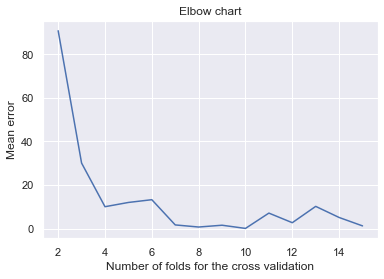

In [41]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.metrics import make_scorer
import math
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

def mean_error(y, y_pred):
    # assuming y and y_pred are numpy arrays
    return np.mean((y_pred - y))


mean_error_scorer = make_scorer(mean_error, greater_is_better=False)


errorlist=[]
for i in range(2,16):
    reg = linear_model.LinearRegression()
    scoring = 'mean_error_scorer'
    mean_error_scorer = make_scorer(mean_error, greater_is_better=False)
    mae = cross_val_score(reg, X_train, y_train, cv=i,scoring=mean_error_scorer)
    #print(mae)
    error= statistics.mean(mae)
    print("Cross validation with "+str(i)+ " folds :",end=" ")
    print(abs(error))
    errorlist.append(abs(error))
    
import matplotlib.pyplot as plt 
import numpy as np 
x = []
for i in range(2,16):
    x.append(i)
plt.plot(x, errorlist)  # Plot the chart 
plt.xlabel("Number of folds for the cross validation")  # add X-axis label 
plt.ylabel("Mean error")  # add Y-axis label 
plt.title("Elbow chart")  # add title 
plt.show()  # display 

According to the above chart, we can assume a value of 4 for K

In [42]:
# Instantiate the linear regressior
lr = linear_model.LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Generate predictions
y_pred = lr.predict(X_test)

In [43]:
k = df.loc[:, train_set.columns != 'price'].shape[1]
n = df.shape[0]
# Add the new results to the result DataFrame
result = pd.DataFrame({
                       'R^2(train)': lr.score(X_train, y_train), 
                       'R^2(test)': lr.score(X_test, y_test), 
                       'Adjusted R^2(train)': lr.score(X_train, y_train)-(k-1)/(n-k)*(1-lr.score(X_train, y_train)),
                       'Adjusted R^2(test)': lr.score(X_test, y_test)-(k-1)/(n-k)*(1-lr.score(X_test, y_test)), 
                       '4-Fold Cross Validation': 
                           cross_val_score(lr, df.loc[:, df.columns != 'price'], df[['price']], cv=4).mean()
                      }, index=['Multiple linear regression'])
result

,R^2(train),R^2(test),Adjusted R^2(train),Adjusted R^2(test),4-Fold Cross Validation
Multiple linear regression,0.69345,0.681503,0.693161,0.681202,0.690467


# Inference from the multiple linear regression

1. The model is little bit underfit since R2 of train set is only around 0.7

2. The model does not have dependable accuracy since R2 and Adjusted R2 is only around 0.7

3. There is a scope for improvement in the model in terms of predictive ability.

# KNN Regression

# Elbow method for finding the value of K (number of neighbours)

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

RMSE value for k=  1 is: 192970.14141695158
RMSE value for k=  2 is: 169518.88456098552
RMSE value for k=  3 is: 160117.52195453577
RMSE value for k=  4 is: 156295.24284300493
RMSE value for k=  5 is: 153510.34238796105
RMSE value for k=  6 is: 152116.1788019825
RMSE value for k=  7 is: 150859.22957244245
RMSE value for k=  8 is: 150601.12482185484
RMSE value for k=  9 is: 150604.87653457842
RMSE value for k=  10 is: 150057.32419199313
RMSE value for k=  11 is: 149735.5300217406
RMSE value for k=  12 is: 149613.83368157194
RMSE value for k=  13 is: 149570.89146893466
RMSE value for k=  14 is: 149604.82471301744
RMSE value for k=  15 is: 149524.69488524203
RMSE value for k=  16 is: 149645.3770876023
RMSE value for k=  17 is: 149750.1727273602
RMSE value for k=  18 is: 149824.34433938935
RMSE value for k=  19 is: 149894.18826056525
RMSE value for k=  20 is: 149915.19008054296


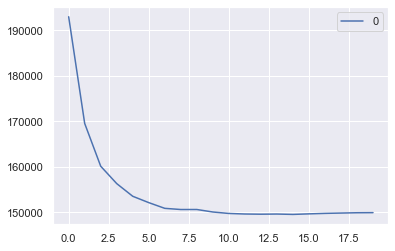

In [44]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,mean_absolute_error  
from math import sqrt
import matplotlib.pyplot as plt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

According to the above chart, we can assume a value of 7 for K

# Hyperparameter tuning and modelling using pipelining

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
# Create a pipeline
pipe = make_pipeline((neighbors.KNeighborsRegressor()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"kneighborsregressor": [neighbors.KNeighborsRegressor()],
                 "kneighborsregressor__n_neighbors":[1,2,3,4,5,6,7]
                 }]
                 

# create a gridsearch of the pipeline, the fit the best model
rf_random = RandomizedSearchCV(pipe, grid_param, cv=4, verbose=0,n_jobs=-1)
best_model = rf_random.fit(X_train, y_train)
#best_model.score(X_test,y_test)
rf_random.best_params_

{'kneighborsregressor__n_neighbors': 7,
 'kneighborsregressor': KNeighborsRegressor(n_neighbors=7)}

In [46]:
k = df.loc[:, train_set.columns != 'price'].shape[1]
n = df.shape[0]
# Add the new results to the result DataFrame
result = pd.DataFrame({
                       'R^2(train)': best_model.score(X_train, y_train), 
                       'R^2(test)': best_model.score(X_test, y_test), 
                       'Adjusted R^2(train)': best_model.score(X_train, y_train)-(k-1)/(n-k)*(1-lr.score(X_train, y_train)),
                       'Adjusted R^2(test)': best_model.score(X_test, y_test)-(k-1)/(n-k)*(1-lr.score(X_test, y_test)), 
                       '4-Fold Cross Validation': 
                           cross_val_score(best_model, df.loc[:, df.columns != 'price'], df[['price']], cv=4).mean()
                      }, index=['KNN regression'])
result

,R^2(train),R^2(test),Adjusted R^2(train),Adjusted R^2(test),4-Fold Cross Validation
KNN regression,0.565409,0.411046,0.56512,0.410745,0.408676


# Inference from the KNN regression

1. The model is little bit underfit since R2 of train set is only around 0.7

2. The model does not have dependable accuracy since R2 and Adjusted R2 is only around 0.7

3. There is a scope for improvement in the model in terms of predictive ability.

# Decision Tree Regression

# Hyperparameter tuning and modelling using pipelining

In [47]:
# Instantiate the decision tree regressior
from sklearn.tree import DecisionTreeRegressor


# Define the train and test sets
X_train = train_set.loc[:, train_set.columns != 'price']
y_train = train_set['price']
X_test = test_set.loc[:, train_set.columns != 'price']
y_test = test_set['price']

from sklearn.pipeline import make_pipeline
# Create a pipeline
pipe = make_pipeline((DecisionTreeRegressor()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"decisiontreeregressor": [DecisionTreeRegressor()],
                 "decisiontreeregressor__max_depth":[10,20,20,40,50,60,70,80,90,100],
                 "decisiontreeregressor__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                 "decisiontreeregressor__max_leaf_nodes": [1,2,3,4,5,6,7,8,9,10]}]



# create a gridsearch of the pipeline, the fit the best model
rf_random = RandomizedSearchCV(pipe, grid_param, cv=4, verbose=0,n_jobs=-1)
best_model = rf_random.fit(X_train, y_train)
#best_model.score(X_test,y_test)
rf_random.best_params_

{'decisiontreeregressor__min_samples_leaf': 10,
 'decisiontreeregressor__max_leaf_nodes': 10,
 'decisiontreeregressor__max_depth': 80,
 'decisiontreeregressor': DecisionTreeRegressor(max_depth=80, max_leaf_nodes=10, min_samples_leaf=10)}

In [48]:
k = df.loc[:, train_set.columns != 'price'].shape[1]
n = df.shape[0]
# Add the new results to the result DataFrame
result = pd.DataFrame({
                       'R^2(train)': best_model.score(X_train, y_train), 
                       'R^2(test)': best_model.score(X_test, y_test), 
                       'Adjusted R^2(train)': best_model.score(X_train, y_train)-(k-1)/(n-k)*(1-lr.score(X_train, y_train)),
                       'Adjusted R^2(test)': best_model.score(X_test, y_test)-(k-1)/(n-k)*(1-lr.score(X_test, y_test)), 
                       '4-Fold Cross Validation': 
                           cross_val_score(best_model, df.loc[:, df.columns != 'price'], df[['price']], cv=4).mean()
                      }, index=['Decision tree regression'])
result

,R^2(train),R^2(test),Adjusted R^2(train),Adjusted R^2(test),4-Fold Cross Validation
Decision tree regression,0.648092,0.637612,0.647802,0.637311,0.641784


# Inference from the decision tree regression

1. The model is little bit underfit since R2 of train set is around 0.65

2. The model does not have dependable accuracy since R2 and Adjusted R2 is only around 0.64

3. There is a scope for improvement in the model in terms of predictive ability.

4. It will be better if we proceed with any advanced model instaed of the decision tree.

# Random forest regression

# Hyperparameter tuning and modelling using pipelining

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor 
# Create a pipeline
pipe = make_pipeline((RandomForestRegressor()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"randomforestregressor": [RandomForestRegressor()],
                 "randomforestregressor__n_estimators": [5,10,15,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
                 "randomforestregressor__max_depth":[5,8,15,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150],
                 "randomforestregressor__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                 "randomforestregressor__max_leaf_nodes": [2, 5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300]}]


# create a gridsearch of the pipeline, the fit the best model
rf_random = RandomizedSearchCV(pipe, grid_param, cv=4, verbose=0,n_jobs=-1)
best_model = rf_random.fit(X_train, y_train)
#best_model.score(X_test,y_test)
rf_random.best_params_

{'randomforestregressor__n_estimators': 65,
 'randomforestregressor__min_samples_leaf': 8,
 'randomforestregressor__max_leaf_nodes': 280,
 'randomforestregressor__max_depth': 80,
 'randomforestregressor': RandomForestRegressor(max_depth=80, max_leaf_nodes=280, min_samples_leaf=8,
                       n_estimators=65)}

In [50]:
k = df.loc[:, train_set.columns != 'price'].shape[1]
n = df.shape[0]
# Add the new results to the result DataFrame
result = pd.DataFrame({
                       'R^2(train)': best_model.score(X_train, y_train), 
                       'R^2(test)': best_model.score(X_test, y_test), 
                       'Adjusted R^2(train)': best_model.score(X_train, y_train)-(k-1)/(n-k)*(1-lr.score(X_train, y_train)),
                       'Adjusted R^2(test)': best_model.score(X_test, y_test)-(k-1)/(n-k)*(1-lr.score(X_test, y_test)), 
                       '4-Fold Cross Validation': 
                           cross_val_score(best_model, df.loc[:, df.columns != 'price'], df[['price']], cv=4).mean()
                      }, index=['Random forest regression'])
result

,R^2(train),R^2(test),Adjusted R^2(train),Adjusted R^2(test),4-Fold Cross Validation
Random forest regression,0.886497,0.834605,0.886208,0.834304,0.840975


# Inference from the random forest tree regression

1. The model seems to have good predictive ability.

2. The model is not overfit or underfit.

# Gradient boosting

# Hyperparameter tuning and modelling using pipelining

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
# Create a pipeline
pipe = make_pipeline((GradientBoostingRegressor()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"gradientboostingregressor": [GradientBoostingRegressor()],
                 "gradientboostingregressor__n_estimators":  [5,10,15,25,30,35,40,45,50],
                 "gradientboostingregressor__max_depth":[5,8,15,25,30,35,40,45,50],
                 "gradientboostingregressor__min_samples_leaf":[3,4,5,6,7,8,9,10],
                 "gradientboostingregressor__max_leaf_nodes": [2, 5,10,15,20,25,30,35,40,45]}]



# create a gridsearch of the pipeline, the fit the best model
rf_random = RandomizedSearchCV(pipe, grid_param, cv=4, verbose=0,n_jobs=-1)
best_model = rf_random.fit(X_train, y_train)
#best_model.score(X_test,y_test)
rf_random.best_params_

{'gradientboostingregressor__n_estimators': 45,
 'gradientboostingregressor__min_samples_leaf': 3,
 'gradientboostingregressor__max_leaf_nodes': 40,
 'gradientboostingregressor__max_depth': 30,
 'gradientboostingregressor': GradientBoostingRegressor(max_depth=30, max_leaf_nodes=40, min_samples_leaf=3,
                           n_estimators=45)}

In [52]:
k = df.loc[:, train_set.columns != 'price'].shape[1]
n = df.shape[0]
# Add the new results to the result DataFrame
result = pd.DataFrame({
                       'R^2(train)': best_model.score(X_train, y_train), 
                       'R^2(test)': best_model.score(X_test, y_test), 
                       'Adjusted R^2(train)': best_model.score(X_train, y_train)-(k-1)/(n-k)*(1-lr.score(X_train, y_train)),
                       'Adjusted R^2(test)': best_model.score(X_test, y_test)-(k-1)/(n-k)*(1-lr.score(X_test, y_test)), 
                       '4-Fold Cross Validation': 
                           cross_val_score(best_model, df.loc[:, df.columns != 'price'], df[['price']], cv=4).mean()
                      }, index=['Gradient boost regression'])
result

,R^2(train),R^2(test),Adjusted R^2(train),Adjusted R^2(test),4-Fold Cross Validation
Gradient boost regression,0.896308,0.859749,0.896018,0.859448,0.856616


# Inference from the Gradient boosting regression

1. The model seems to have good predictive ability.

2. The model is not overfit or underfit.

# Overall model inference

1. Clearly, Multiple linear regression and Decision tree regression are not fit for this data.

2. As a part of advanced modelling, we tried the data with a bagging model (Random forest).

3. It performed well in the data with a R2 score of 0.83

4. For a second opinion, we tried the  data with a boosting model (Gradient boosting).

5. It also performed well in the data with a R2 score of 0.85.

6. Since, there is no considerable change in R2 score for both the models, we can select Random forest as final algorithm for this problem.

7. This because bagging always tries to decrease the variance but boosting tries to decrease the bias. Incase of any unstable patterns in the test data in the real time, bagging may perform well in this data. 


# Deployment

# Saving the model in a picke file

In [53]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(best_model, 'model.pkl') 
  
# Load the model from the file 
bsm_from_pickle = joblib.load('model.pkl')  

#Check the prediction with test data
bsm_from_pickle.predict(X_test) 

array([602218.30686112, 342361.09644166, 557207.57638968, ...,
       211668.83452774, 364216.43009747, 188053.3937038 ])

# User input

In [60]:
room_bed = 4
room_bath = 2
living_measure = 7.62
lot_measure = 20894
ceil = 2.0
coast = 0
sight = 0
condition = 3
quality = 9
ceil_measure =2430
basement= 240
yr_built = 2000
yr_renovated =0
zipcode =98155
lat = 47.7735
long = 122.281
living_measure15 = 2440
lot_measure15 = 16815
furnished = 0
total_area = 22018

# Predicting the house price for a user input using pickle file

In [63]:
input_dictionary = {
'room_bed' : room_bed,
'room_bath' : room_bath,
'living_measure' : living_measure,
'lot_measure' : lot_measure,
'ceil' : ceil,
'coast' : coast,
'sight' : sight,
'condition' : condition,
'quality' : quality,
'ceil_measure' : ceil_measure,
'basement' : basement,
'yr_built' : yr_built,
'yr_renovated' : yr_renovated,
'zipcode' : zipcode,
'lat' : lat,
'long' : long,
'living_measure15' : living_measure15,
'lot_measure15' : lot_measure15,
'furnished' : furnished,
'total_area' : total_area    
}

inputlist=np.array([room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area])

df = pd.DataFrame(input_dictionary,index=[0])


#inputlist
print("House price prediction for the given input is - ")
print(bsm_from_pickle.predict(df)[0])

House price prediction for the given input is - 
467250.1248876115


In [62]:
mean_prediction=np.mean(bsm_from_pickle.predict(X_test)) 
mean_prediction

470121.71807417105

The mean prediction given by the model  is 470282 and the prediction is given by the pickle for a single observation is 467250
Hence, we can safely assume that there  is an error of approximately 2871 or  0.6%